# Adidas Sales Prediction (Time Series)

In [ ]:
# Kütüphaneleri yükleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Sezonluk inceleme, arima modeli ile tahmin
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/BTK/day7/adidas-quarterly-sales.csv")
df

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558
...,...,...
83,2020Q4,5142
84,2021Q1,5268
85,2021Q2,5077
86,2021Q3,5752


In [ ]:
#pip install plotly

In [ ]:
#interaktif veri görselleştirme
import plotly.express as px
fig=px.line(df,x="Time Period",y="Revenue")
fig.show()

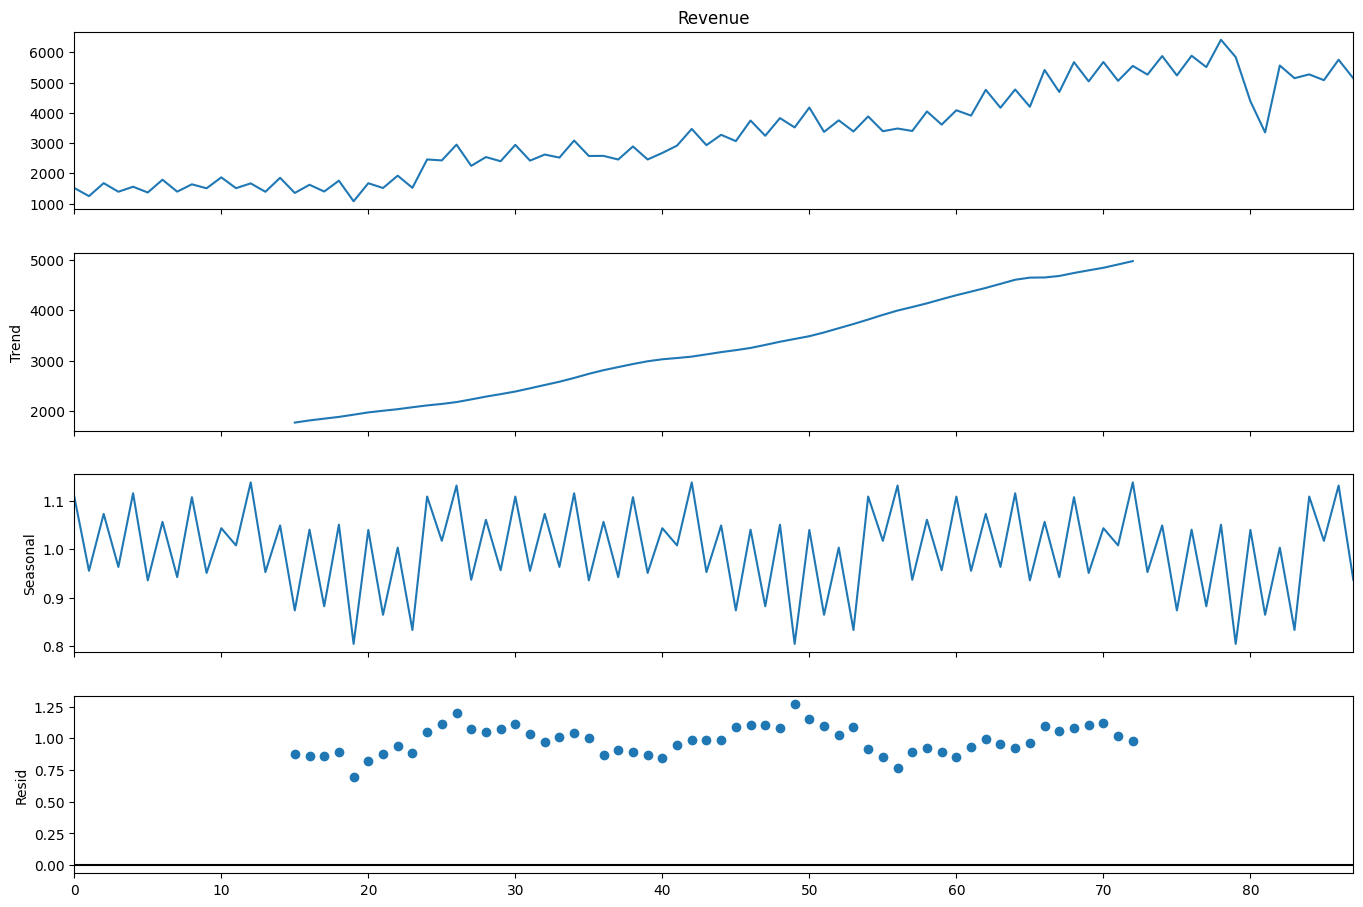

In [ ]:
result=seasonal_decompose(df["Revenue"],model="multiplicative",period=30)
fig=result.plot()
fig.set_size_inches(15,10)
fig.show()

## Zaman Serisi Grafiği Unsurları Trend: Zaman serisinin genel eğilimi. Veriler zaman içinde artıyor mu azalıyor mu yoksa sabit mi kalıyor?

Mevsimsellik : Belirli zaman dilimlerinde tekrarlayan
desenler
Düzensizlik : Veri üzerinde rastgele dalgalanmalar.
Bu veri toplamada hatalar veya beklenmeyen olaylardan kaynaklabilir.

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df["Revenue"],order=(1,1,1),
                                seasonal_order=(1,1,1,12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -548.282
Date:                            Tue, 23 Jul 2024   AIC                           1106.564
Time:                                    09:37:55   BIC                           1118.152
Sample:                                         0   HQIC                          1111.191
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7176      0.053     13.636      0.000       0.614       0.821
ma.L1         -0.9981      0.546   

In [ ]:
y_pred=model.predict(start=len(df),end=len(df)+20)

<Axes: >

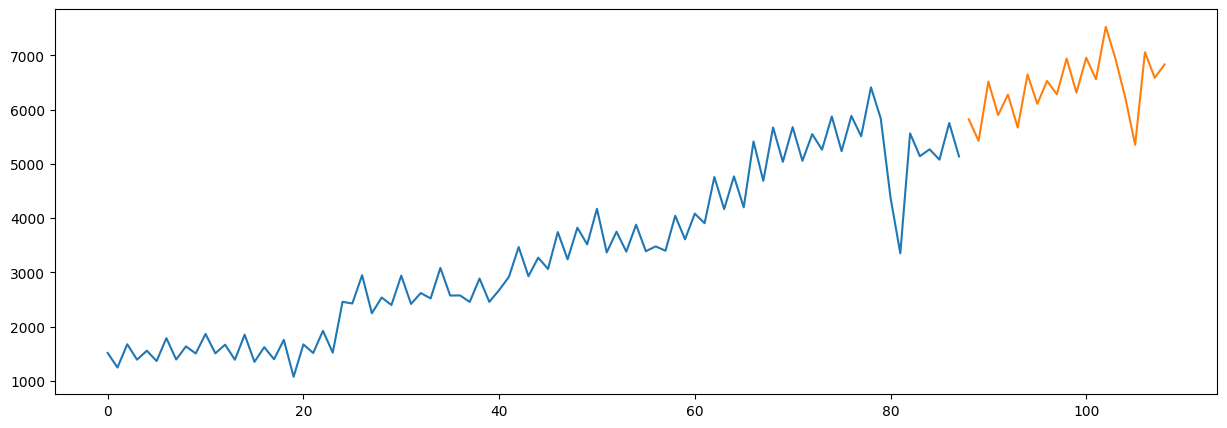

In [ ]:
df["Revenue"].plot(figsize=(15,5))
y_pred.plot(figsize=(15,5))

In [ ]:
#corona olmasaydı
df_without_corona=pd.DataFrame(df["Revenue"][:75],columns=["Revenue"])
df_without_corona

,Revenue
0,1517
1,1248
2,1677
3,1393
4,1558
...,...
70,5677
71,5056
72,5548
73,5261


In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df["Revenue"],order=(1,1,1),
                                seasonal_order=(1,1,1,12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -548.282
Date:                            Tue, 23 Jul 2024   AIC                           1106.564
Time:                                    09:45:38   BIC                           1118.152
Sample:                                         0   HQIC                          1111.191
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7176      0.053     13.636      0.000       0.614       0.821
ma.L1         -0.9981      0.546   

In [ ]:
prediction=model.predict(start=len(df_without_corona),end=len(df_without_corona)+20)
print(prediction)

75    5040.876238
76    5496.217173
77    5355.653521
78    5973.782440
79    5615.763887
80    5911.548281
81    4405.491488
82    4445.043198
83    5103.435780
84    5630.958969
85    5156.925303
86    5935.556298
87    5244.678357
88    5821.163245
89    5422.104735
90    6515.955097
91    5899.908612
92    6275.658026
93    5667.940633
94    6646.274345
95    6105.787876
Name: predicted_mean, dtype: float64


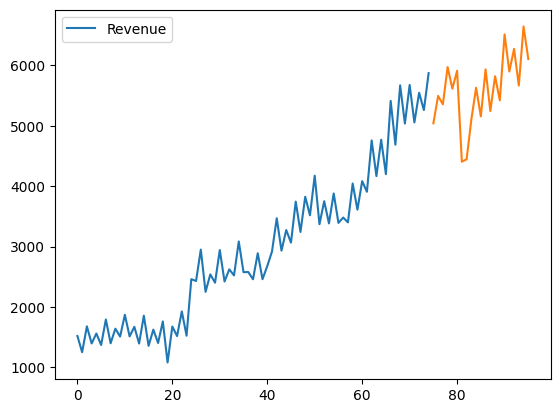

In [ ]:
df_without_corona.plot()
prediction.plot()
plt.show()